# Classifying the Clothes Images

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

In [136]:
from __future__ import print_function, absolute_import, division

Importing the tensorflow datasets and tensorflow

In [137]:
import tensorflow as tf
#import tensorflow_datasets as tfds ( for version > 1.13.0 )
from tensorflow.keras.datasets import fashion_mnist # for version <1.13.0
tf.logging.set_verbosity(tf.logging.ERROR)

In [138]:
#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [139]:
# # Improving the bar display
# import tqdm
# import tqdm.auto
# tqdm.tqdm = tqdm.auto.tqdm

In [140]:
print(tf.__version__)

1.10.0


In [141]:
#tf.enable_eager_execution() # For tensorflow < 2.0

### Importing the Fashion MNIST Dataset

Here we use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70,000 grayscale images in 10 categories. The dimensions of images are (28 * 28)  
![fmnist](fmnist.png)  
The Fashion MNIST is slightly mre challenging than the regular mnist dataset.

In [142]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fashion_mnist.load_data()  
Returns tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`

Loading the dataset returns metadata as well as a training dataset and test dataset.

The model is trained using train_dataset.  
The model is tested against test_dataset.  
The images are 28  ×  28 arrays, with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]. These correspond to the class of clothing the image represents:  

**Label	Class  
0-----------T-shirt/top  
1-----------Trouser  
2-----------Pullover  
3-----------Dress  
4-----------Coat  
5-----------Sandal  
6-----------Shirt  
7-----------Sneaker  
8-----------Bag  
9-----------Ankle boot  **

The class names are not already present so we will make an own list of the class names

In [143]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the data

In [144]:
train_images.shape

(60000, 28, 28)

We can see that there are total 60k images of 28 * 28 pixel size

In [145]:
len(train_images)

60000

In [146]:
max(train_labels), min(train_labels)

(9, 0)

We can see that the labels are between 0 to 9.

In [147]:
len(test_images)

10000

We got 10k images in the test set

### Preprocessing the data

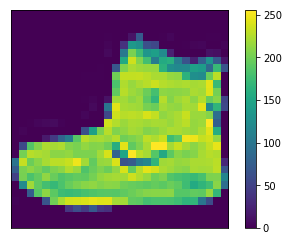

In [148]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

From the above image we can see that the pixel values fall in the range 0 to 255.  
We will do some normalization here using the standard normalizing technique and squish the values between 0 to 1.

In [149]:
train_images = train_images / 255
test_images = test_images/ 255

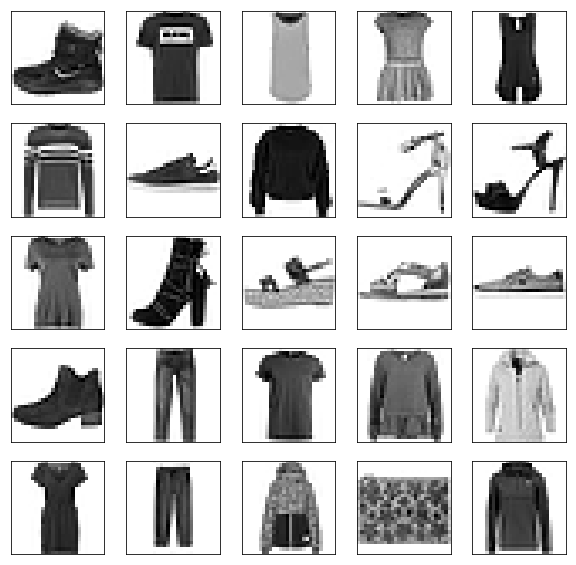

In [150]:
plt.figure(figsize=  (10, 10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap= plt.cm.binary)
plt.show()

### Building the Model

We will build the layers and then we will compile the model

#### Setting up the layers

The basic building block of a neural network is the layer and then we will use the **Sequential()** to stack the layers

In [151]:
model = tf.keras.Sequential(layers = [tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. we can think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.


####  Compiling the model

Now we compile the model using the optimizers and the loss functions:  
- **optimizer** - Adam  
- **loss function** - sparse_categorical_crossentropy  

In [152]:
model.compile(optimizer= tf.train.AdamOptimizer(0.01), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

### Training the Model

Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the **train_images** and **train_labels** arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data:

In [153]:
model.fit(train_images, train_labels, epochs= 5, verbose= 2)

Epoch 1/5
 - 16s - loss: 0.5271 - acc: 0.8117
Epoch 2/5
 - 20s - loss: 0.4322 - acc: 0.8461
Epoch 3/5
 - 16s - loss: 0.4183 - acc: 0.8506
Epoch 4/5
 - 16s - loss: 0.3952 - acc: 0.8588
Epoch 5/5
 - 18s - loss: 0.3929 - acc: 0.8600


So we have got 86% accuracy on the train dataset.

### Evaluating the accuracy

In [154]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 213us/step


In [155]:
print("Accuracy on the test set: {}\nLoss on the test set: {}".format(test_acc, test_loss))

Accuracy on the test set: 0.8375
Loss on the test set: 0.5083342670917511


In [156]:
predictions = model.predict(test_images)

In [157]:
print("Predictions Probabilities for image 1 are:\n{}".format(predictions[0]))

Predictions Probabilities for image 1 are:
[3.0234018e-12 9.3639284e-11 4.4923305e-26 2.8634438e-16 4.3123389e-14
 1.2676650e-01 2.0261939e-21 4.4108894e-02 1.9518496e-09 8.2912457e-01]


In [158]:
print("The belonging class is {} and the probability is {}".format(np.argmax(predictions[0]), max(predictions[0])*100))

The belonging class is 9 and the probability is 82.91245698928833


So we can see that the maximum probaility of the image belongs to class 9.  
We can see that the class 9 is the boot.  


In [159]:
print(class_names[9])

Ankle boot


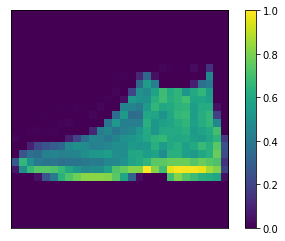

In [160]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

We can take a look at the images along with their predicted probabilities graph.

In [161]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

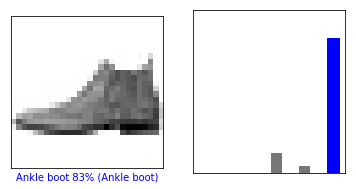

In [162]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

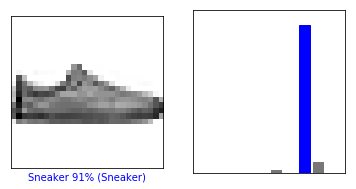

In [163]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

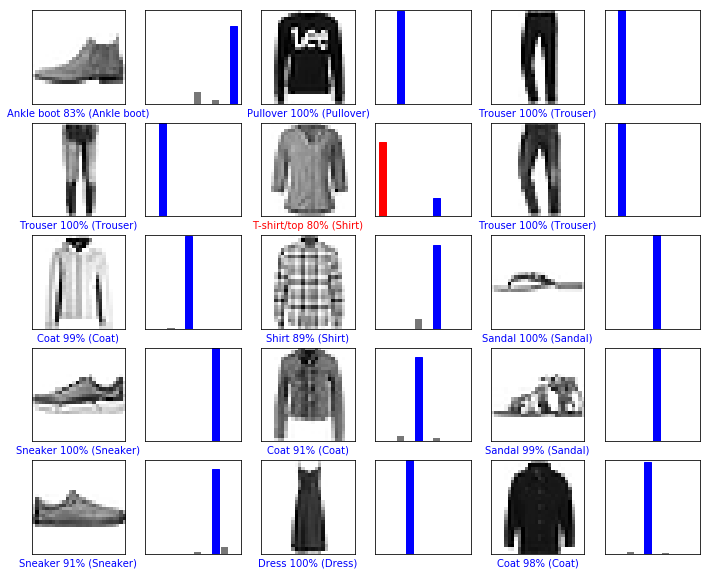

In [164]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Now we can make a prediction on the single image

In [173]:
img = test_images[0]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [174]:
img = (np.expand_dims(img, 0))   # tf.expand_dims not working here
print(img.shape)

(1, 28, 28)


In [175]:
prediction_single = model.predict(img)
print(prediction_single)

[[3.0233856e-12 9.3638784e-11 4.4922809e-26 2.8634232e-16 4.3123155e-14
  1.2676631e-01 2.0261716e-21 4.4108860e-02 1.9518427e-09 8.2912487e-01]]


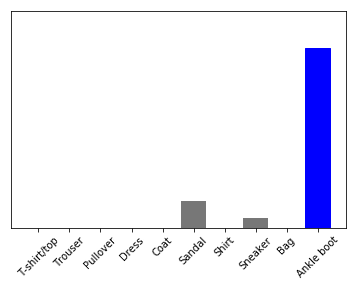

In [179]:
plot_value_array(0, prediction_single, test_labels)
plt.xticks(range(10), class_names, rotation = 45)
plt.show()

### de nada!